# Iterate & Evaluate Classifier

In [125]:
# Load modules.

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [126]:
# Load data.

amazon = pd.read_table('~/src/data/feedbackAnalysis/amazon_cells_labelled.txt', header=None)
amazon.columns = ['comment', 'sentiment_score']
print(amazon.shape)
amazon.head()

(1000, 2)


,comment,sentiment_score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Keywords Classifier:

In [127]:
# 18 positive
keywords1 = ['great', 'good', 'really good', 'love', 'loved', 'excellent', 'best', 'strong',
            'wonderful', 'new', 'right', 'beautiful', 'pleased', 'tremendous', 'awesome',
            'incredible', 'brilliant', 'impressed']

# 18 negative
keywords2 = ['bad', 'terrible', 'horrible', 'hate', 'not', 'poor', 'disappointed', 'awful',
             'slow', 'below', 'under', 'lack', 'broken', 'waste', 'junk', 'dirty',
             'worst', 'issues']

# 1st 9 positive, 1st 9 negative
keywords3 = ['great', 'good', 'really good', 'love', 'loved', 'excellent', 'best', 'strong',
            'wonderful', 'bad', 'terrible', 'horrible', 'hate', 'not', 'poor', 'disappointed',
             'awful', 'slow']

# 2nd 9 positive, 2nd 9 negative
keywords4 = ['new', 'right', 'beautiful', 'pleased', 'tremendous', 'awesome', 'incredible',
             'brilliant', 'impressed', 'below', 'under', 'lack', 'broken', 'waste', 'junk',
             'dirty', 'worst', 'issues']

# hand-picked 9pos 9neg
keywords5 = ['great', 'good', 'love', 'excellent', 'best', 'awesome', 'incredible', 'beautiful',
             'new', 'bad', 'issues', 'worst', 'broken', 'poor', 'horrible', 'terrible',
             'disappointed', 'broken']

In [128]:
keywords = keywords5

# Run the Model:

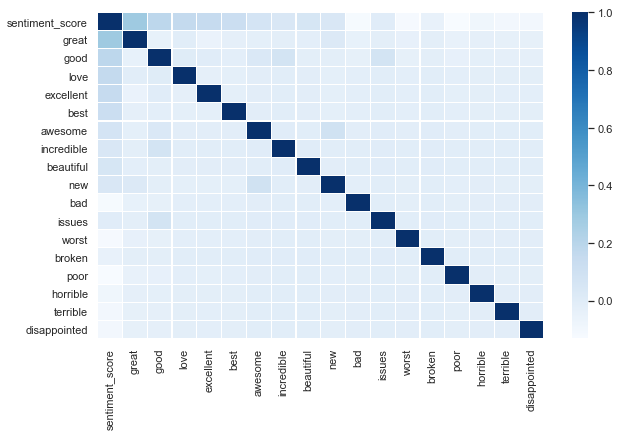

In [129]:
# Adding boolean columns for our keywords to dataframe.
for key in keywords:
    amazon[str(key)] = amazon.comment.str.contains('' + str(key) + '', case=False)

# Turn sentiment_score column into boolean. 
amazon['sentiment_score'] = (amazon['sentiment_score'] == 1)

# Creating a correlation heatmap.
sns.set(style='white')
plt.figure(figsize=(10, 6))
sns.heatmap(amazon.corr(), linewidths=.1, cmap='Blues')

# Lower correlation between the variables, will use Naive Bayes Classifier Model.
data = amazon[keywords]
target = amazon['sentiment_score']

# Boolean data, importing Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

# Calculating Sensitivity & Specificity.
confmatrix = confusion_matrix(target, y_pred)
sensativityVal = 100*confmatrix[1, 1] / (confmatrix[1, 1] + confmatrix[1, 0])
specificityVal = 100*confmatrix[0, 0] / (confmatrix[0, 0] + confmatrix[0, 1])

# Model Result:

In [130]:
print('Bernoulli Classifier Model Accuracy: ', accuracy_score(target, y_pred))
print('Confusion Matrix:')
print(confmatrix)
print('Sensitivity - The percentage of positives correctly identified: ', sensativityVal, '%')
print('Specificity - The percentage of negatives correctly identified: ', specificityVal, '%')
print('Cross-Validation Accuracy Scores: ', cross_val_score(bnb, data, target, cv=10))

Bernoulli Classifier Model Accuracy:  0.701
Confusion Matrix:
[[471  29]
 [270 230]]
Sensitivity - The percentage of positives correctly identified:  46.0 %
Specificity - The percentage of negatives correctly identified:  94.2 %
Cross-Validation Accuracy Scores:  [0.76 0.73 0.78 0.71 0.7  0.68 0.64 0.69 0.71 0.61]


# Results from 5 versions:

### 18 Positive Adjectives:
Bernoulli Classifier Model Accuracy:  0.709
<br>Confusion Matrix:
<br>[[470  30]
<br> [261 239]]
<br>Sensitivity - The percentage of positives correctly identified:  47.8 %
<br>Specificity - The percentage of negatives correctly identified:  94.0 %
<br>Cross-Validation Accuracy Scores:  [0.76 0.74 0.79 0.71 0.69 0.69 0.63 0.67 0.72 0.61]

### 18 Negative Adjectives:
Bernoulli Classifier Model Accuracy:  0.693
<br>Confusion Matrix:
<br>[[213 287]
<br> [ 20 480]]
<br>Sensitivity - The percentage of positives correctly identified:  96.0 %
<br>Specificity - The percentage of negatives correctly identified:  42.6 %
<br>Cross-Validation Accuracy Scores:  [0.67 0.73 0.73 0.69 0.74 0.64 0.66 0.62 0.7  0.67]

### 1st 9 Positive, 1st 9 Negative Ajdectives:
Bernoulli Classifier Model Accuracy:  0.697
<br>Confusion Matrix:
<br>[[486  14]
<br> [289 211]]
<br>Sensitivity - The percentage of positives correctly identified:  42.2 %
<br>Specificity - The percentage of negatives correctly identified:  97.2 %
<br>Cross-Validation Accuracy Scores:  [0.74 0.72 0.78 0.71 0.68 0.68 0.59 0.67 0.73 0.61]

### 2nd 9 Positive, 2nd 9 Negative Adjectives:
Bernoulli Classifier Model Accuracy:  0.544
<br>Confusion Matrix:
<br>[[ 49 451]
<br> [  5 495]]
<br>Sensitivity - The percentage of positives correctly identified:  99.0 %
<br>Specificity - The percentage of negatives correctly identified:  9.8 %
<br>Cross-Validation Accuracy Scores:  [0.52 0.51 0.55 0.56 0.52 0.55 0.5  0.5  0.55 0.53]

### Hand-Picked, 9 Positive & 9 Negative Adjectives:
Bernoulli Classifier Model Accuracy:  0.701
<br>Confusion Matrix:
<br>[[471  29]
<br> [270 230]]
<br>Sensitivity - The percentage of positives correctly identified:  46.0 %
<br>Specificity - The percentage of negatives correctly identified:  94.2 %
<br>Cross-Validation Accuracy Scores:  [0.76 0.73 0.78 0.71 0.7  0.68 0.64 0.69 0.71 0.61]